## Calculting $\pi$ with a Monte Carlo Simulation
___

Here we will be estimating the value of $\pi$ using a monte carlo simulation. The theory is as follows:

- Define a circle with radius, $r=1.0$, which is enclosed in a 2x2 square.
- The area of the cirlce is $\pi r^2 = \pi\cdot(1)^2 = \pi$, and the area of the square is $\ell \times w = 2\times2=4$ (I think...you might have to check my math...)
- If we divide the area of the circle by the area of the square we get $\pi /4$.
- So, if you were to randomly drop a grain of sand on this square, the probability of this grain falling within the circle is $\pi /4$. This is because:

$$Pr(\text{in the circle}) = \frac{\text{outcomes in circle}}{\text{total outcomes}} = \frac{\text{area of circle}}{\text{area of square}} = \frac{\pi}{4}$$

**So the plan of attack:**
1. Randomly drop grains of sand into the square.
1. The number of grains that land within the circle will represnt the approximate area of the cirlce.
1. Every grain will land within the square&mdash;because the cirlce is within the square&mdash;so the total number of grains will approximate the area of the square.
1. And by rearranging the above equation, we see

$$\begin{align} \frac{\pi}{4} &= \frac{\text{area of circle}}{\text{area of square}} \\ \Rightarrow \pi &\approx 4\cdot \frac{\text{Number of grains inside the circle}}{\text{Total number of grains dropped}} \end{align}$$


Importing some dependencies, and specifiying a random seed.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rnd = np.random.RandomState(seed=2)

The following cell will ask you how many points to draw on our canvas.

In [ ]:
N = int(float(input("How many data points to generate? ")))

How many data points to generate? 17


Here we generate N random data points and determine whether or not it is contained within a circle of radius 1.

In [ ]:
X = rnd.uniform(-1, 1, size=N*2)
x, y = X.reshape((2, N))

r = 1.0 ## Radius of our reference circle
inner = x**2 + y**2 < r**2 ##Checking if points are in the cirlce
outer = ~inner ## If they aren't in the circle, they must be outside

Time to plot the data we created!

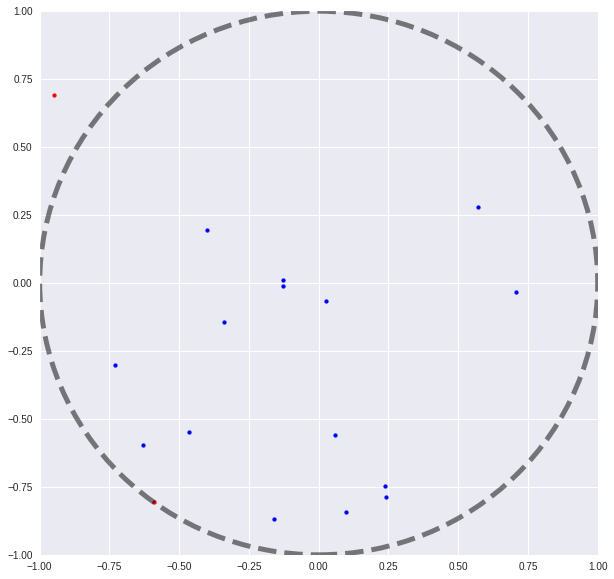

π [N = 17] is 3.5294117647058822


In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()

## -- Plotting points outside the ref. circle
plt.scatter(x[outer], y[outer], color='r', s=15)

## -- Plotting points inside the ref. circle
plt.scatter(x[inner], y[inner], color='b', s=15)

## -- A static circle of radius 1
ax.add_artist(plt.Circle((0,0), r, fill=False, 
                     color='k', lw=5, ls='--', alpha=0.5))

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

pi = 4.0 * len(x[inner])/N
print(f"π [N = {N}] is {pi}")

**Congrats, you just estimated $\pi$!**